In [12]:
from astropy.io import fits
from astropy.wcs import WCS
import numpy as np
from astropy.time import Time
import os
from scipy.signal import lombscargle
from bokeh.palettes import viridis, inferno

from bokeh.plotting import output_notebook, figure, show
from bokeh.models import HoverTool, tools,ColumnDataSource, Whisker, ColorBar, LinearColorMapper
#output_notebook()

from bokeh.models import LogColorMapper, LogTicker, ColorBar
from bokeh.models.glyphs import Text
from astropy.timeseries import LombScargle

import matplotlib.pyplot as plt
#%matplotlib widget
# use seaborn for plot styles
import seaborn; seaborn.set()

from astropy import units as u
from astropy.coordinates import SkyCoord


from bokeh.models.ranges import Range1d

import aplpy
from PyAstronomy.pyTiming import pyPDM
output_notebook()


Loading BokehJS ...

# CMD

In [13]:
radeg = 154.4066250
decdeg = -46.3978361
separ = 0.0006413

f275 = [ ]
f336 = [ ]
f606 = [ ]

radeglist = []
decdeglist = []
ind = []
name = []

cat = 'hst/hlsp_hugs_hst_wfc3-uvis-acs-wfc_ngc3201_multi_v1_catalog-meth3.txt'

with open(cat,'r') as file:
    for index, line in enumerate(file):
    #for line in file:
        line = line.strip()
        if not line:  # line is blank
            continue
        if line.startswith("#"):  # comment line
            continue
        b = line.split()
        #if float(b[2]) != -99.9999 and float(b[8]) != -99.9999 and float(b[32]) > 90.:
        if float(b[2]) != -99.9999 and float(b[8]) != -99.9999:

            ind.append(index+1)
            name.append(b[35].strip('R'))

            f275.append(float(b[2]))
            f336.append(float(b[8]))
            f606.append(float(b[20]))
            membertemp = float(b[32])
            radeglist.append(float(b[33]))
            decdeglist.append(float(b[34]))
            
            #c1 = SkyCoord(float(b[33])*u.deg, float(b[34])*u.deg, frame='fk5')
            #rahmsstr = c1.ra.to_string(u.hour,sep=':')
            #decdmsstr = c1.dec.to_string(u.degree, alwayssign=True,sep=':')
            #ra.append(rahmsstr)
            #radeglist.append(c1.ra.deg)
            #decdeglist.append(c1.dec.deg)

            #dec.append(decdmsstr)
            #Center MUSe and separation
            #265.1734892, -53.6711580
color = ['green'] * len(radeglist)
size = [1] * len(radeglist)
color = np.array(color)
size = np.array(size)
name = np.array(name)

scalarc = SkyCoord(ra=radeg*u.degree, dec=decdeg*u.degree)
ral = np.array(radeglist)
decl = np.array(decdeglist)
catalog = SkyCoord(ra=ral*u.degree, dec=decl*u.degree)
d2d = scalarc.separation(catalog)
catalogmsk = d2d < separ*u.deg
idxcatalog = np.where(catalogmsk)[0]
print(len(idxcatalog))
annotation = ['a']*len(idxcatalog)
color[idxcatalog] = 'red'
size[idxcatalog] = 5
annotationtext = name[idxcatalog]
p = figure(plot_width=800, plot_height=500)

# change just some things about the x-axes
p.xaxis.axis_label = "275-336"


# change just some things about the y-axes
p.yaxis.axis_label = "275"


f275 = np.array(f275)
f336 = np.array(f336)

xval = f275-f336

yval = f275


#Tool to get wavelength
hover2 = HoverTool(
        tooltips=[
            ("File index", "@name"),
            ('(ra,dec)', '(@ra,@dec)')
        ]
    )

        
p.add_tools(hover2)

source = ColumnDataSource(data=dict(
    x=xval,
    y=yval,
    color=color,
    size = size,
    ra = radeglist,
    dec = decdeglist,
    name = name
))


# add a circle renderer with a size, color, and alpha
p.circle('x','y',color='color',size='size',source=source)

annotationx = xval[idxcatalog]
annotationy = yval[idxcatalog]

p.text(annotationx, annotationy, annotationtext, angle=0.3, text_color="#96deb3")
#plot.add_glyph(source, glyph)



#p = Scatter(data, x=xval, y=yval, title=title, xlabel=xlabel, ylabel=ylabel)
xmax = xval.max()
xmin = xval.min()
ymax = yval.min()
ymin = yval.max()
p.x_range = Range1d(xmin, xmax)
p.y_range = Range1d(ymin, ymax)
show(p)

9


# Region

In [14]:
#region to plot
findreghugsclose = 'closestarserase.reg'
listregs = []

with open(findreghugsclose,'w') as fileone:
    for index in idxcatalog:
            #text='circle({0},{1},.1") # color=blue text={2} \n'.format(ra[index],dec[index],'{'+str(ind[index])+"}")
            text='fk5;circle({0},{1},0.1") # color=green text={2} \n'.format(radeglist[index],decdeglist[index],'{CMDID'+str(name[index])+"}")
            listregs.append(text)
            #text='fk5; circle({0},{1},.1") # color=red text=\{{2}\}\n'.format(ra[index],dec[index],index)
            fileone.write(text)
            #print(text)


INFO: Auto-setting vmin to -2.960e+01 [aplpy.core]
INFO: Auto-setting vmax to  2.606e+01 [aplpy.core]


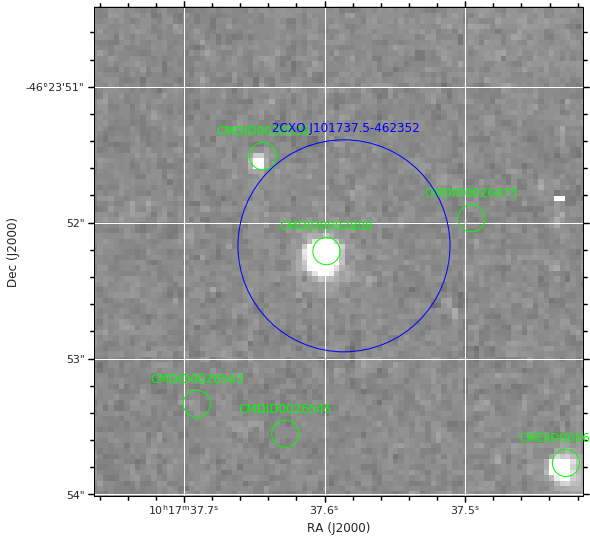

In [15]:
fig = aplpy.FITSFigure('hst/hlsp_hugs_hst_wfc3-uvis_ngc3201_f275w_v1_stack-0754s.fits')
fig.show_grayscale()
fig.recenter(radeg, decdeg, width=0.001, height=0.001)  # degree
fig.show_regions(findreghugsclose)
fig.show_regions('ChandraSourceCatNGC3201.reg')
fig.show_regions('WebbNGC3201.reg')

# ACS data

In [16]:
#radeg = 154.4066250
#decdeg = -46.3978361
#separ = 0.0006413

f606 = []
f814 = []
vegavminusi = []
xpos = []
ypos = []

radeglist = []
decdeglist = []
ind = []
name = []

cat = 'hst/acscatalog.txt'

with open(cat,'r') as file:
    file.readline()
    for index, line in enumerate(file):
    #for line in file:
        line = line.strip()
        if not line:  # line is blank
            continue
        if line.startswith("#"):  # comment line
            continue
        b = line.split()
        #if float(b[2]) != -99.9999 and float(b[8]) != -99.9999 and float(b[32]) > 90.:

        ind.append(index+1)
        name.append(b[0])

        f606.append(float(b[3]))
        f814.append(float(b[7]))
        vegavminusi.append(float(b[5]))

        radeglist.append(float(b[21]))
        decdeglist.append(float(b[22]))

        xpos.append(float(b[1]))
        ypos.append(float(b[2]))

            #c1 = SkyCoord(float(b[33])*u.deg, float(b[34])*u.deg, frame='fk5')
            #rahmsstr = c1.ra.to_string(u.hour,sep=':')
            #decdmsstr = c1.dec.to_string(u.degree, alwayssign=True,sep=':')
            #ra.append(rahmsstr)
            #radeglist.append(c1.ra.deg)
            #decdeglist.append(c1.dec.deg)

            #dec.append(decdmsstr)
            #Center MUSe and separation
            #265.1734892, -53.6711580
color = ['green'] * len(radeglist)
size = [1] * len(radeglist)
color = np.array(color)
size = np.array(size)
name = np.array(name)

scalarc = SkyCoord(ra=radeg*u.degree, dec=decdeg*u.degree)
ral = np.array(radeglist)
decl = np.array(decdeglist)
catalog = SkyCoord(ra=ral*u.degree, dec=decl*u.degree)
d2d = scalarc.separation(catalog)
catalogmsk = d2d < separ*u.deg
idxcatalog = np.where(catalogmsk)[0]
print(len(idxcatalog))
annotation = ['a']*len(idxcatalog)
color[idxcatalog] = 'red'
size[idxcatalog] = 5
annotationtext = name[idxcatalog]
p = figure(plot_width=800, plot_height=500,title='ACS')

# change just some things about the x-axes
p.xaxis.axis_label = "V(F606)-I(F814)"


# change just some things about the y-axes
p.yaxis.axis_label = "V(F606)"


f606 = np.array(f606)
f814 = np.array(f814)

xval = np.array(vegavminusi)

yval = f606


#Tool to get wavelength
hover2 = HoverTool(
        tooltips=[
            ("File index", "@name"),
            ('(ra,dec)', '(@ra,@dec)')
        ]
    )

        
p.add_tools(hover2)

source = ColumnDataSource(data=dict(
    x=xval,
    y=yval,
    color=color,
    size = size,
    ra = radeglist,
    dec = decdeglist,
    name = name
))


# add a circle renderer with a size, color, and alpha
p.circle('x','y',color='color',size='size',source=source)

annotationx = xval[idxcatalog]
annotationy = yval[idxcatalog]

p.text(annotationx, annotationy, annotationtext, angle=0.3, text_color="#96deb3")
#plot.add_glyph(source, glyph)



#p = Scatter(data, x=xval, y=yval, title=title, xlabel=xlabel, ylabel=ylabel)
xmax = xval.max()
xmin = xval.min()
ymax = yval.min()
ymin = yval.max()
p.x_range = Range1d(xmin, xmax)
p.y_range = Range1d(ymin, ymax)
show(p)

13


# ACS x and y region

In [17]:
#region to plot
ACSfindreg = 'ACSclosestarsxandy.reg'
listregs = []

with open(ACSfindreg,'w') as fileone:
    for index in idxcatalog:
            #text='circle({0},{1},.1") # color=blue text={2} \n'.format(ra[index],dec[index],'{'+str(ind[index])+"}")
            text='circle({0},{1},0.1") # color=green text={2} \n'.format(xpos[index],ypos[index],'{ACSID'+str(name[index])+"}")
            listregs.append(text)
            #text='fk5; circle({0},{1},.1") # color=red text=\{{2}\}\n'.format(ra[index],dec[index],index)
            fileone.write(text)
            #print(text)


In [18]:
#region to plot
ACSfindregaclose = 'ACSraanddecclosel.reg'
listregs = []

with open(ACSfindregaclose,'w') as fileone:
    for index in idxcatalog:
            #text='circle({0},{1},.1") # color=blue text={2} \n'.format(ra[index],dec[index],'{'+str(ind[index])+"}")
            text='fk5; circle({0},{1},0.1") # color=red text={2} \n'.format(radeglist[index],decdeglist[index],'{ACSID'+str(name[index])+"}")
            listregs.append(text)
            #text='fk5; circle({0},{1},.1") # color=red text=\{{2}\}\n'.format(ra[index],dec[index],index)
            fileone.write(text)
            #print(text)


# Both

INFO: Auto-setting vmin to -2.960e+01 [aplpy.core]
INFO: Auto-setting vmax to  2.606e+01 [aplpy.core]


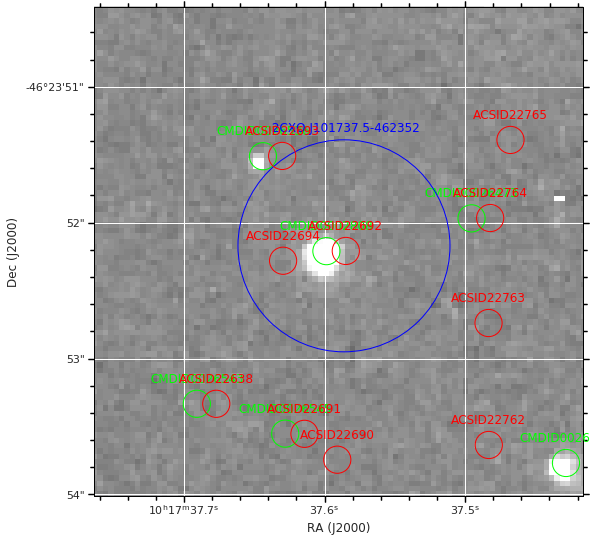

In [19]:
fig = aplpy.FITSFigure('hst/hlsp_hugs_hst_wfc3-uvis_ngc3201_f275w_v1_stack-0754s.fits')
fig.show_grayscale()
fig.recenter(radeg, decdeg, width=0.001, height=0.001)  # degree
fig.show_regions(findreghugsclose)
fig.show_regions('ChandraSourceCatNGC3201.reg')
fig.show_regions(ACSfindregaclose)
fig.show_regions('WebbNGC3201.reg')